# Geographical Demand Patterns


In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# read in data
data = pd.read_csv("csvs/p.csv", index_col=0)


# Calculate frequency of start/end-station


In [3]:
groupedbyStartS = data.groupby("start_station_id")[
    'start_station_name'].describe()
groupedbyStartS = groupedbyStartS.sort_values(['count'], ascending=False)[
    ["count", "top"]]  # remove unneeded columns
groupedbyStartS = groupedbyStartS.rename(
    {"top": "station_name"}, axis=1)  # rename column to station name
groupedbyStartS


count                                   station_name
start_station_id                                                      
3010              17510                                  15th & Spruce
3021              17114                                     18th & JFK
3045              13319                                  13th & Locust
3054              13157                                   Rodin Museum
3020              12665                        University City Station
...                 ...                                            ...
3122                334  24th & Cecil B. Moore, Cecil B. Moore Library
3183                253                              15th & Kitty Hawk
3186                165                                12th & Normandy
3184                 58                          Health Sciences Drive
3000                 46                                Virtual Station

[135 rows x 2 columns]

In [4]:
groupedbyEndS = data.groupby("end_station_id")['end_station_name'].describe()
groupedbyEndS = groupedbyEndS.sort_values(['count'], ascending=False)[
    ["count", "top"]]  # remove unneeded columns
groupedbyEndS = groupedbyEndS.rename(
    {"top": "station_name"}, axis=1)  # rename column to station name
groupedbyEndS


count                                   station_name
end_station_id                                                      
3021            20503                                     18th & JFK
3010            17420                                  15th & Spruce
3054            13333                                   Rodin Museum
3045            13150                                  13th & Locust
3057            12476                     Philadelphia Museum of Art
...               ...                                            ...
3181              354                                  Crescent Park
3122              326  24th & Cecil B. Moore, Cecil B. Moore Library
3183              252                              15th & Kitty Hawk
3186              138                                12th & Normandy
3184               16                          Health Sciences Drive

[135 rows x 2 columns]

# Add up frequency of start and end station


# Evaluation of the combined Start & End Station Table below

### Observations:

- Top 60 stations have more than 10.000 rides in the given timeframe
- Top 15 station have more than 20.000 rides in the given timeframe
- Last 40 stations have less than 10.000 rides in the given timeframe

From the given table, and particularly having a look at the top 10 stations on Google Maps, it is noticeable that stations near universities (_University City Station_), parking (_15th & Spruce_), tourist attractions (_Rodin Museum_ & _Philadelphia Museum of Art_), subway/railway stations (_13th & Locust_) are the most popular.
One of the reasons for the popularity of stations near subway/railway stations or parking could be that commuters rent a bike to drive the last section to work, thus avoiding dense traffic or high parking fees near work. Tourists may also prefer to rent a bike and drive around Philadelphia instead of hiring a taxi, thus saving additional costs.


In [5]:
# merge start and end stations
freq = pd.merge(groupedbyStartS, groupedbyEndS, left_index=True,
                right_index=True)
# remove duplicate name column
freq = freq.drop("station_name_y", axis=1)
# add column with counts added up
freq['total_count'] = freq.count_x+freq.count_y
freq = freq.drop(["count_x", "count_y"], axis=1)
# rename station name column
freq = freq.rename({"station_name_x": "station_name"}, axis=1)
# order by total count
freq = freq.sort_values(['total_count'], ascending=False)
freq


station_name total_count
3021                                     18th & JFK       37617
3010                                  15th & Spruce       34930
3054                                   Rodin Museum       26490
3045                                  13th & Locust       26469
3057                     Philadelphia Museum of Art       24864
...                                             ...         ...
3181                                  Crescent Park         750
3122  24th & Cecil B. Moore, Cecil B. Moore Library         660
3183                              15th & Kitty Hawk         505
3186                                12th & Normandy         303
3184                          Health Sciences Drive          74

[135 rows x 2 columns]

# Visualizations


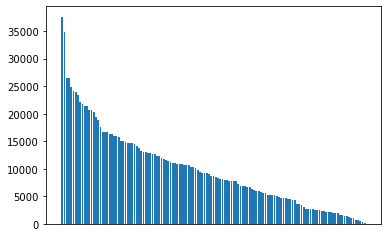

In [6]:
plt.bar(freq["station_name"], freq["total_count"])
f = plt.gca()
f.axes.get_xaxis().set_visible(False)


# Common routes


### Evaluation of the Common Routes

- Aside from the reasons for the popularity of particular stations already mentioned, the route from University City Station to _23rd & South, 21st & Catharine, 19th & Lombard_ is also highly popular. These stations are notable in that they lack a fast public transportation connection and are, on average, 2 miles (3.2 km) from the university away. Students are likely to take this route.
- The premise that tourists are conveniently traveling around Philadelphia on bikes is reinforced by the route Rodin Museum - Pennsylvania & Fairmount Perelman Building, since both are museums.
- On Google Streetviews, the popular start and end station _Point Breeze & Tasker_ appear to be in a residential area. It's probable that residents utilize bicycles to do their grocery shopping.


In [7]:
# find common routes (name can be replaced by id if needed)
commonRoutes = data.groupby(["start_station_name", "end_station_name"]).size(
).reset_index().rename(columns={0: 'count'})
# order by most common routes
commonRoutes = commonRoutes.sort_values(["count"], ascending=False)
commonRoutes.head(20)


start_station_name  \
13440                  Philadelphia Museum of Art   
14743                     University City Station   
14021                                Rodin Museum   
13188  Pennsylvania & Fairmount Perelman Building   
4824                                 23rd & South   
4125                             21st & Catharine   
13656                       Point Breeze & Tasker   
3049           18th & Washington, Chew Playground   
14737                     University City Station   
5150                                25th & Locust   
1828                                15th & Market   
13091  Pennsylvania & Fairmount Perelman Building   
2088                                15th & Spruce   
14731                     University City Station   
13181  Pennsylvania & Fairmount Perelman Building   
2920                                   18th & JFK   
3009                                   18th & JFK   
3383                               19th & Lombard   
3541                             20th & Fairmount   
4025                             21st & Catharine   

                                 end_station_name  count  
13440                  Philadelphia Museum of Art   2743  
14743                                23rd & South   1557  
14021  Pennsylvania & Fairmount Perelman Building   1406  
13188                                Rodin Museum   1127  
4824                      University City Station   1098  
4125                      University City Station   1009  
13656                       Point Breeze & Tasker    973  
3049                                   18th & JFK    940  
14737                            21st & Catharine    934  
5150                                25th & Locust    884  
1828                                15th & Market    877  
13091                                  18th & JFK    865  
2088                                15th & Spruce    820  
14731                              19th & Lombard    816  
13181  Pennsylvania & Fairmount Perelman Building    803  
2920                                   18th & JFK    799  
3009   Pennsylvania & Fairmount Perelman Building    796  
3383                      University City Station    789  
3541                                   18th & JFK    780  
4025                                   18th & JFK    766

# Check whether routes with matching start and destination behave differently compared to one-way routes


Trips that start and end in the same location take significantly longer on average. A potential reason for this is that commutes, which are usually fairly short, are one way trips, meaning they have a different start and end location. These short commutes lower the average trip duration for one-way trips, but don't affect round trips(same start and end point). Another reason could be that day trips from tourist will often end at their starting location, which in turn increses the average trip duration for round trips.


In [8]:
# convert time fields to datetime
data['start_time'] = pd.to_datetime(data['start_time'])
data['end_time'] = pd.to_datetime(data['end_time'])


df = pd.DataFrame(
    {'same_start_and_end': data["end_station_id"] == data["start_station_id"], 'trip_duration': data["end_time"]-data["start_time"]})
df.groupby("same_start_and_end").describe()


trip_duration                            \
                           count                      mean   
same_start_and_end                                           
False                     622332 0 days 00:20:00.736777154   
True                       46259 0 days 00:38:06.896387729   

                                                                \
                                         std               min   
same_start_and_end                                               
False              0 days 01:18:53.702300615 -1 days +23:06:00   
True               0 days 01:33:14.111603090   0 days 00:01:00   

                                                                    \
                               25%             50%             75%   
same_start_and_end                                                   
False              0 days 00:07:00 0 days 00:11:00 0 days 00:17:00   
True               0 days 00:01:00 0 days 00:19:00 0 days 00:46:00   

                                    
                               max  
same_start_and_end                  
False              5 days 05:51:00  
True               4 days 00:09:00